In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
customer_in = pd.Series([0])
customer_out = pd.Series([0])
station1 = 0
station2 = 0
start_customer = 0
finish_customer = 0
clock = 0

next_arrival = np.random.exponential(1.8)
next_station1_1 = 1e10
next_station1_2 = 1e10
next_station2 = 1e10

In [8]:
#for i in range(4000):
while finish_customer < 4000:
    clock = min(next_station1_1,next_station1_2,next_station2,next_arrival)

    if next_arrival == clock:
        station1 += 1
        start_customer += 1
        customer_in[start_customer] = clock
    elif next_station1_1 == clock:
        station1 -= 1
        station2 += 1
    elif next_station1_2 == clock:
        station1 -= 1
        station2 += 1
    elif next_station2 == clock:
        station2 -= 1
        finish_customer += 1
        customer_out[finish_customer] = clock

        '''
        next_station2_add = np.random.normal(0.5,1.5)
        while next_station2_add <= 0:
            next_station2_add = np.random.normal(0.5,1.5)
        next_station2 = next_station2 + next_station2_add
        '''



    next_arrival = clock + np.random.exponential(1.8)

    if station1 >= 2:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + np.random.exponential(1)
    elif station1 > 0:
        next_station1_1 = clock + np.random.exponential(1)
        next_station1_2 = clock + 1e10
    else:
        next_station1_1 = clock + 1e10
        next_station1_2 = clock + 1e10

    if station2 > 0:
        next_station2 = clock + np.random.exponential(1/2)
    else:
        next_station2 = clock + 1e10


In [9]:
sojourn_time = customer_out - customer_in
warmed_sojourn_time = sojourn_time[1000:4000]

(array([544., 909., 705., 414., 243., 102.,  56.,  15.,   9.,   3.]),
 array([0.01996197, 0.75330333, 1.4866447 , 2.21998606, 2.95332743,
        3.68666879, 4.42001015, 5.15335152, 5.88669288, 6.62003425,
        7.35337561]),
 <BarContainer object of 10 artists>)

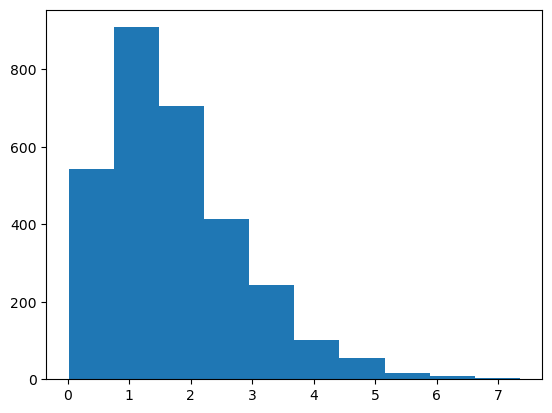

In [11]:
plt.hist(warmed_sojourn_time)


In [13]:
np.random.normal(0.5,0.15)


0.4361296860292899